In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r"test.csv")

data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Type of Travel"] = le.fit_transform(data["Type of Travel"])
data["Gender"] = le.fit_transform(data["Gender"])
data["satisfaction"] = le.fit_transform(data["satisfaction"])
data["Customer Type"] = le.fit_transform(data["Customer Type"])
data["Class"] = data["Class"].map({ "Eco":1,"Eco Plus":2,"Business":3})


"""data["JobType"] = data["JobType"].map({" ?":np.nan, " Never-worked":0,
                                       " Without-pay":1," Self-emp-not-inc":2,
                                       " Self-emp-inc":3," Private":4,
                                         "Local-gov":5," State-gov":6," Federal-gov":7," Without-pay":8})"""




Y = data.iloc[:,-1]
X = data.iloc[:,2:-1]

from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values = np.nan, strategy = "mean")
missing_data = X.values
missing_data = missing_data.reshape(len(missing_data),X.shape[1])
imputer = imputer.fit(missing_data)
X = imputer.transform(missing_data)
X1 = pd.DataFrame(X)


from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X1,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values
x_train

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [18]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))

print("before PCA")
print_metrics(y_test, y_pred) 

before PCA
Precision Score: 0.8672432869614268
Recall Score: 0.8637355389402981
Accuracy Score: 0.8677242505540651
F1 Score: 0.8652181717817253


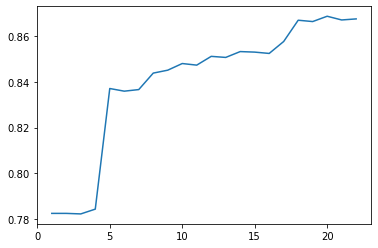

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
def pca_compare(n):
    accuracy_scores = []
    x = 0

    for i in range(1,n):
        
        pca = PCA(n_components = i, whiten = True)   # whiten = True ????????
        pca.fit(x_train)
        x_pca_train = pca.transform(x_train)
        x_pca_test= pca.transform(x_test)
        
        lr = LogisticRegression(random_state = 0)
        
        lr.fit(x_pca_train,y_train)

        y_pred1 = lr.predict(x_pca_test)
        
        x = accuracy_score(y_test, y_pred1)
        accuracy_scores.append(x)
        
    return accuracy_scores
    
plt.plot(range(1,23), pca_compare(23))
        



In [20]:
"""pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))"""

'pca = PCA().fit(X)\n\nplt.plot(np.cumsum(pca.explained_variance_ratio_))'

In [21]:
pca = PCA(n_components = 5, whiten = True)   # whiten = True ????????
pca.fit(x_train)
x_pca_train = pca.transform(x_train)
x_pca_test= pca.transform(x_test)


lr.fit(x_pca_train,y_train)

y_pred1 = lr.predict(x_pca_test)


In [22]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test,y_pred1)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))

print("after PCA")   
print_metrics(y_test, y_pred1) 

after PCA
Precision Score: 0.8364895210837071
Recall Score: 0.8320583706977878
Accuracy Score: 0.837163186749096
F1 Score: 0.8338142315432122
